In [1]:
# Import neccesory libraries

import pandas as pd
from urllib.parse import urlencode
import os
import string
import re
import numpy as np 

import nltk

from nltk.corpus import stopwords
stop = stopwords.words('english')

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

#nltk.PorterStemmer()


#stemming
from nltk.stem import PorterStemmer
stemmer =PorterStemmer()

#lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Visualization libraries
import seaborn as sns 
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

In [2]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
# Reading data

train=pd.read_csv('C:\\Users\\moomi\\OneDrive\\سطح المكتب\\Level#8\\NLP\\project\\phase1\\Project\\train.csv')
test=pd.read_csv('C:\\Users\\moomi\\OneDrive\\سطح المكتب\\Level#8\\NLP\\project\\phase1\\Project\\test.csv')

In [4]:
train.head()

,Unnamed: 0,AuthorName,Text
0,0,AaronPressman,A break-in at the U.S. Justice Department's Wo...
1,1,AaronPressman,Supreme Court justices Wednesday sharply quest...
2,2,AaronPressman,The Internet continued to grow in leaps and bo...
3,3,AaronPressman,Hewlett-Packard Co. unveiled a new plan Monday...
4,4,AaronPressman,The Internet continued to grow in leaps and bo...


In [5]:
test.head()

,Unnamed: 0,AuthorName,Text
0,0,AaronPressman,Commuters stuck in traffic on the Leesburg Pik...
1,1,AaronPressman,Congress revives the debate over encryption ex...
2,2,AaronPressman,Federal bank regulators have begun prodding U....
3,3,AaronPressman,Privacy advocates warned Wednesday that the Cl...
4,4,AaronPressman,The number of banks charging non-customers for...


In [6]:
train.drop(['Unnamed: 0'], axis= 1, inplace= True)
test.drop(['Unnamed: 0'], axis= 1, inplace= True)

## Fixing Authors Name in both train and test dataset

In [7]:
author_list = list(train['AuthorName'].unique())
train['AuthorName']= train['AuthorName'].apply(lambda x: re.sub(r"(\w)([A-Z])", r"\1 \2", x))
test['AuthorName']= test['AuthorName'].apply(lambda x: re.sub(r"(\w)([A-Z])", r"\1 \2", x))

In [8]:
train.head()

,AuthorName,Text
0,Aaron Pressman,A break-in at the U.S. Justice Department's Wo...
1,Aaron Pressman,Supreme Court justices Wednesday sharply quest...
2,Aaron Pressman,The Internet continued to grow in leaps and bo...
3,Aaron Pressman,Hewlett-Packard Co. unveiled a new plan Monday...
4,Aaron Pressman,The Internet continued to grow in leaps and bo...


## EXPLORING OUR DATA BEFORE CLEANING

C:\Users\moomi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


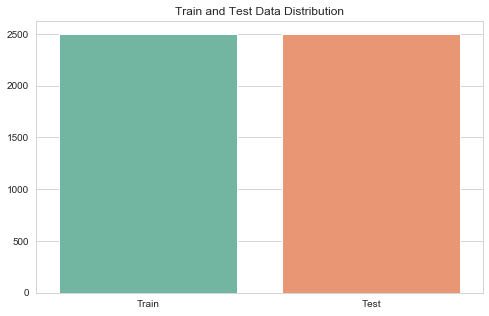

In [9]:
# Distribution on Train and Test Set

plt.figure(figsize=(8,5))
plt.title("Train and Test Data Distribution")
labels = ['Train','Test']
y = [len(train['AuthorName']), len(train['AuthorName'])]

sns.barplot(labels, y,palette="Set2")




C:\Users\moomi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


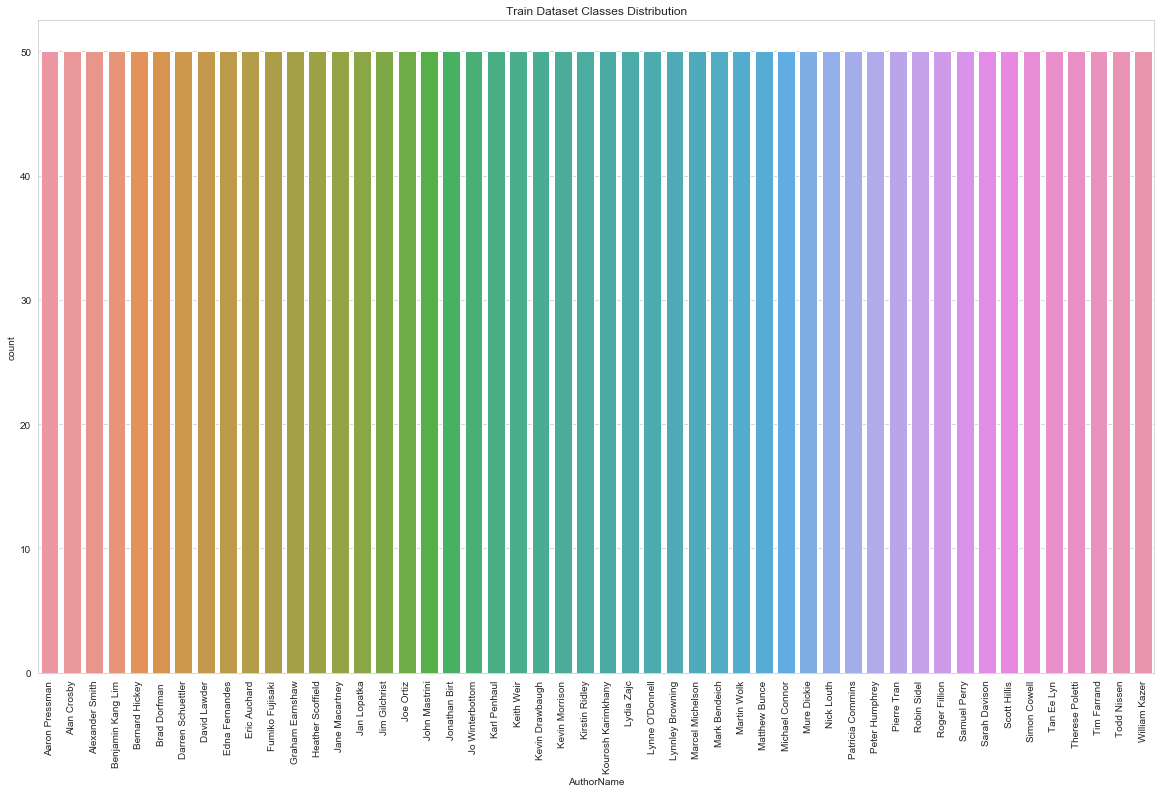

In [10]:
# Checking the class distribution of Train dataset

plt.figure(figsize=(20,12))
plt.title("Train Dataset Classes Distribution")
plt.xticks(rotation=90)
sns.countplot(train['AuthorName'])


In [11]:
print(len(train['AuthorName'].value_counts()))

50


C:\Users\moomi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


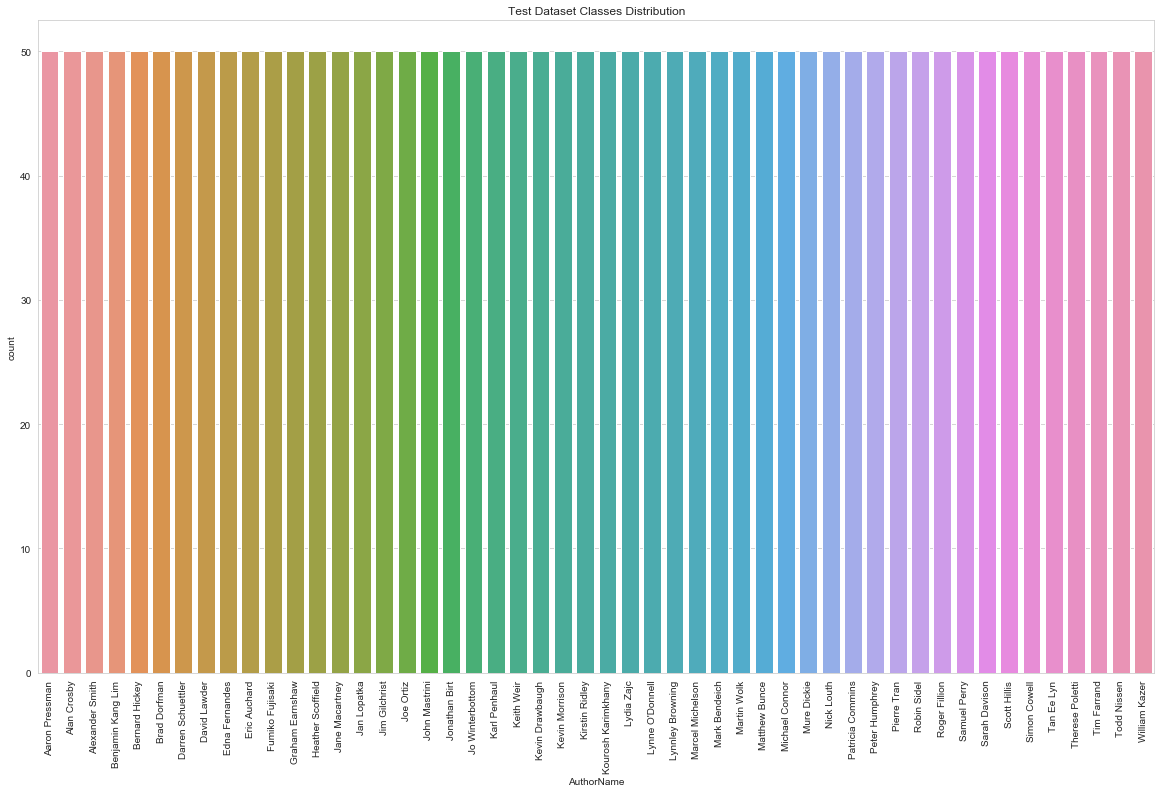

In [12]:
# Checking the class distribution of Test dataset

plt.figure(figsize=(20,12))
plt.title("Test Dataset Classes Distribution")
plt.xticks(rotation=90)
sns.countplot(test['AuthorName'])

In [13]:
print(len(test['AuthorName'].value_counts()))

50


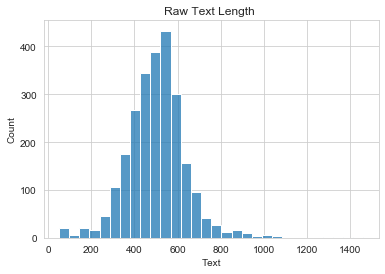

In [14]:
# Histogram to check the size of the raw text

plt.title('Raw Text Length ')
sns.histplot(train['Text'].apply(lambda x: len(x.split())), bins=30)

In [15]:
def clean_text(text):
    # Removing "\n" and "\" from the text
    text= text.replace('\n', "").replace('\'', "")
    
    # Removing stop words
    text = " ".join([item for item in text.split() if item not in stop])

    # Removing URLS from the text 
    text=re.sub(r'http\S+ ', '', text, flags=re.MULTILINE)
    # Removing puntuation from the text
    text = "".join([item for item in text if item not in string.punctuation])
    # After removing the URLS we are left with "(", that can be easily replaced
    text.replace("(","")
    
    return text

# Tokenize
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text.split()]
    text = ' '.join(text)
    return text

#Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text.split()]
    text = ' '.join(text)
    return text

In [16]:
# Apply cleaning on data

train['Clean']= train['Text'].apply(lambda x: clean_text(x))
test['Clean']= test['Text'].apply(lambda x:clean_text(x))

## Feature Engineering 


In [17]:
# Calculating the length of Raw text
train['Raw Length']=train['Text'].apply(lambda x: len(x.split()))

In [18]:
# Calcuating number of punctuations
train['Punctuation_count']=train['Text'].apply(lambda x: len([item for item in x if item in string.punctuation]))

In [19]:
# Getting Sentence Length
train['Sentence_length'] = train['Clean'].apply(lambda x: len(str(x).split("."or "!" or "?")))

In [20]:
# Getting Number of digits
train['Digit_Length'] = train['Clean'].apply(lambda x: len(re.findall(r"\d+",x)))

In [21]:
# Getting Lengh of Clean text
train['Clean Length']=train['Clean'].apply(lambda x: len(x.split()))

In [22]:
# Average Word Length
train['Average_Clean_Word_Length']=sum(train['Clean Length'])/len(train['Clean Length'])

In [23]:
# Average Sentence Length
train['Average_Sentence_Length']=sum(train['Sentence_length'])/len(train['Sentence_length'])

In [24]:
# Stemming
train['Clean_stem']=train['Clean'].apply(lambda x: stemming(x))

In [25]:
# Lemmatizing
train['Clean_lem']=train['Clean'].apply(lambda x: lemmatizer(x))

In [26]:
train.head()

,AuthorName,Text,Clean,Raw Length,Punctuation_count,Sentence_length,Digit_Length,Clean Length,Average_Clean_Word_Length,Average_Sentence_Length,Clean_stem,Clean_lem
0,Aaron Pressman,A break-in at the U.S. Justice Department's Wo...,A breakin US Justice Departments World Wide We...,408,81,1,2,267,307.8696,1.0,A breakin US justic depart world wide web site...,A breakin US Justice Departments World Wide We...
1,Aaron Pressman,Supreme Court justices Wednesday sharply quest...,Supreme Court justices Wednesday sharply quest...,505,74,1,9,310,307.8696,1.0,suprem court justic wednesday sharpli question...,Supreme Court justice Wednesday sharply questi...
2,Aaron Pressman,The Internet continued to grow in leaps and bo...,The Internet continued grow leaps bounds year ...,332,44,1,7,199,307.8696,1.0,the internet continu grow leap bound year onli...,The Internet continued grow leap bound year on...
3,Aaron Pressman,Hewlett-Packard Co. unveiled a new plan Monday...,HewlettPackard Co unveiled new plan Monday boo...,446,68,1,0,270,307.8696,1.0,hewlettpackard Co unveil new plan monday boost...,HewlettPackard Co unveiled new plan Monday boo...
4,Aaron Pressman,The Internet continued to grow in leaps and bo...,The Internet continued grow leaps bounds year ...,332,44,1,7,199,307.8696,1.0,the internet continu grow leap bound year onli...,The Internet continued grow leap bound year on...


In [27]:
# Lemmatizing and stemming on test set
test['Clean_lem']=test['Text'].apply(lambda x: lemmatizer(x))
test['Clean_stem']=test['Text'].apply(lambda x: stemming(x))

## Exploring the Text with Extracted Features


In [28]:
author = train['AuthorName'].unique()

In [29]:
raw_length_mean = []
punct_length_mean = []
sent_length_mean = []
digits_length_mean = []
for y in range(len(author)):
    x = train[train['AuthorName']==author[y]]
    raw_length_mean.append(x['Raw Length'].mean())
    punct_length_mean.append(x['Punctuation_count'].mean())
    sent_length_mean.append(x['Sentence_length'].mean())
    digits_length_mean.append(x['Digit_Length'].mean())

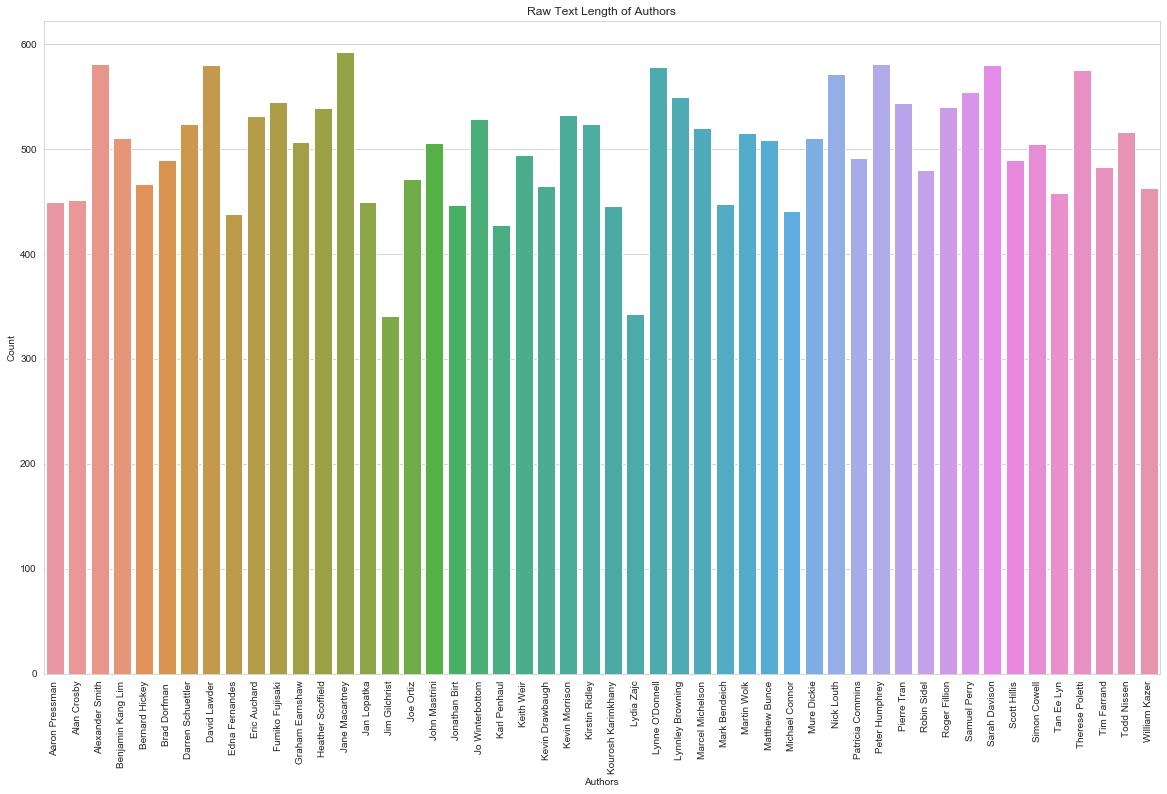

In [30]:
# Raw Text Length of Authors

plt.figure(figsize=(20,12))
plt.title("Raw Text Length of Authors")
plt.xticks(rotation=90)
plt.xlabel('Authors')
plt.ylabel('Count')
sns.barplot(x=author, y=raw_length_mean)

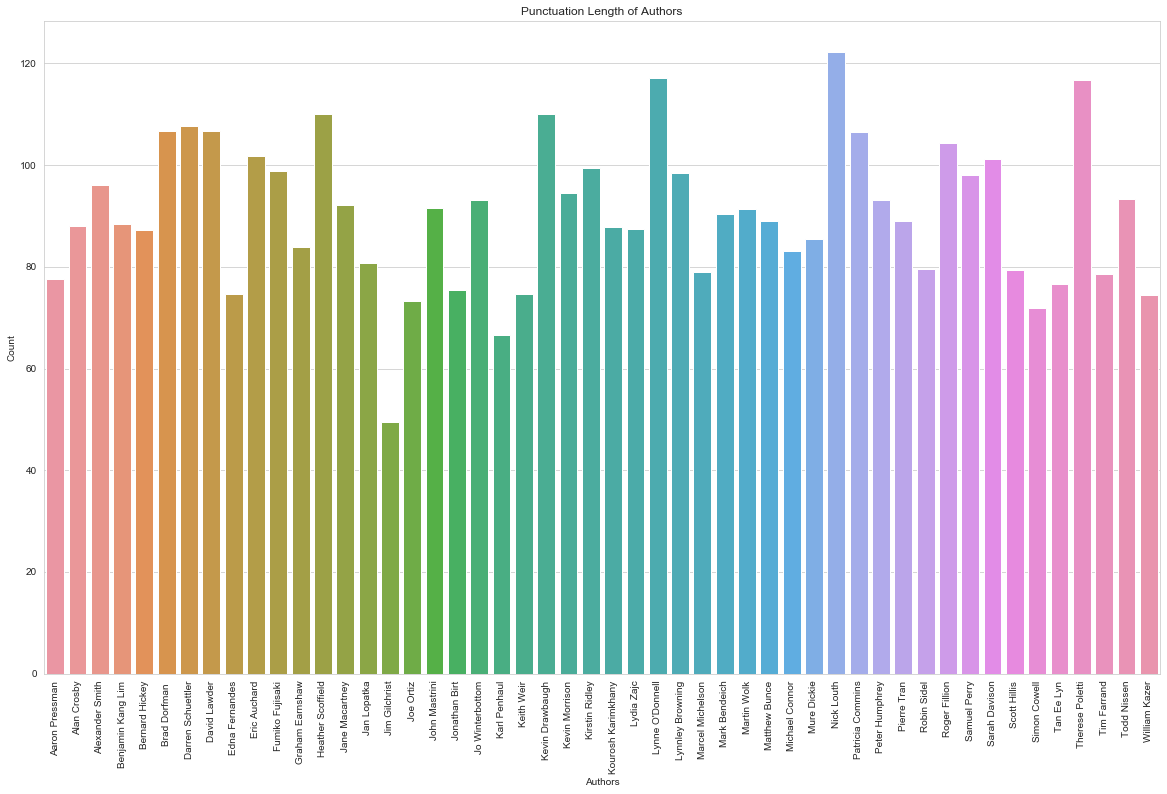

In [32]:
# Punctuation length of the authors

plt.figure(figsize=(20,12))
plt.title("Punctuation Length of Authors")
plt.xticks(rotation=90)
plt.xlabel('Authors')
plt.ylabel('Count')
sns.barplot(x=author, y=punct_length_mean)

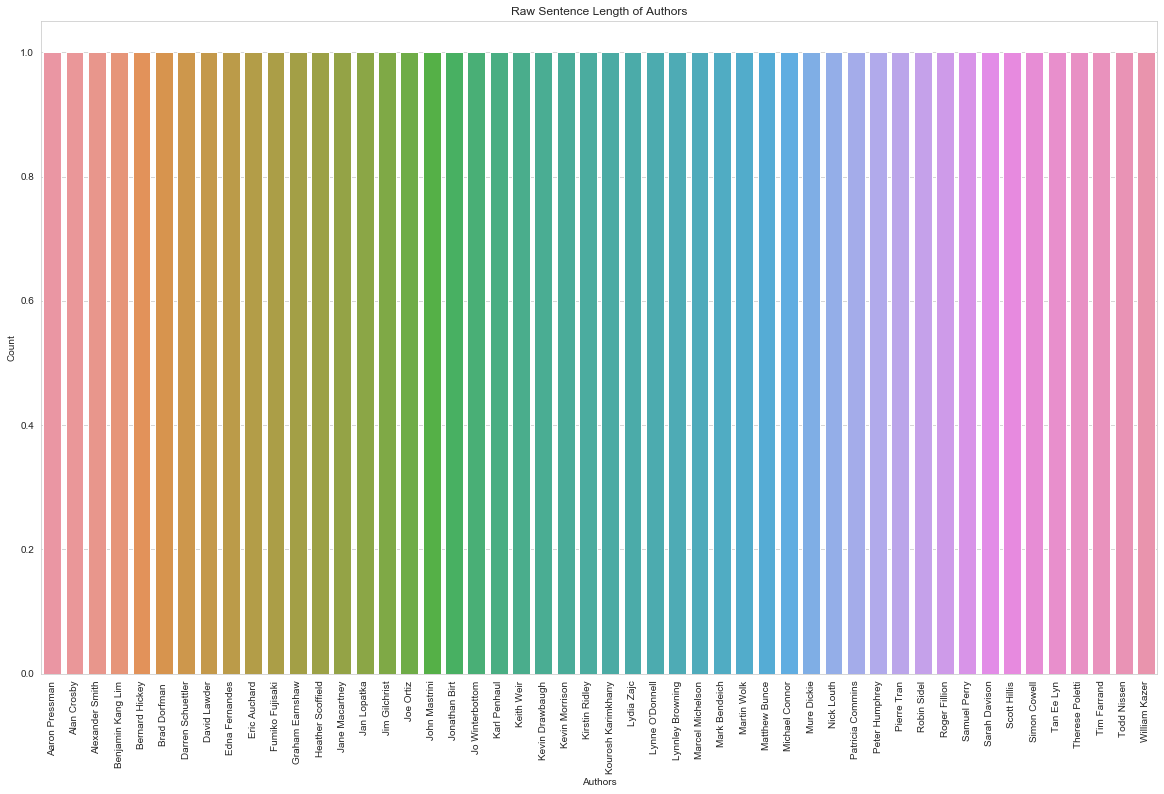

In [33]:
# Sentence Length of Authors

plt.figure(figsize=(20,12))
plt.title("Raw Sentence Length of Authors")
plt.xticks(rotation=90)
plt.xlabel('Authors')
plt.ylabel('Count')
sns.barplot(x=author, y=sent_length_mean)

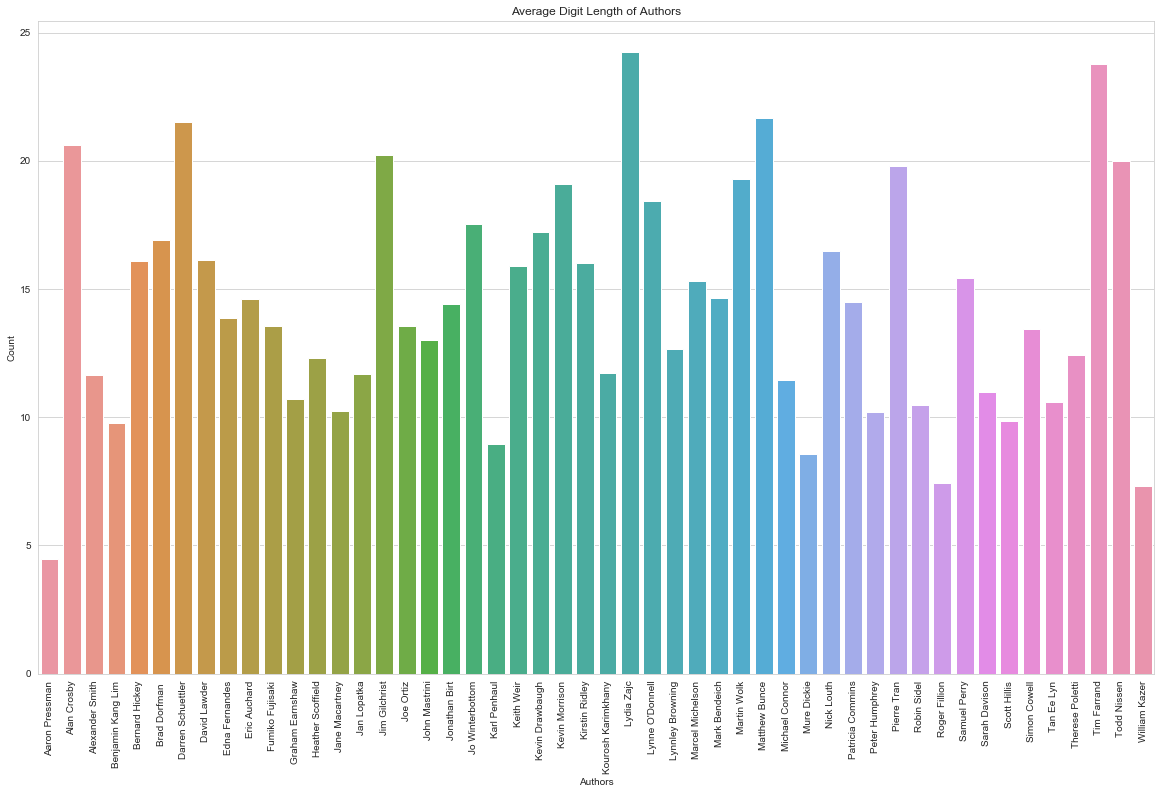

In [34]:
# Digit Length of Authors

plt.figure(figsize=(20,12))
plt.title("Average Digit Length of Authors")
plt.xticks(rotation=90)
plt.xlabel('Authors')
plt.ylabel('Count')
sns.barplot(x=author, y=digits_length_mean)

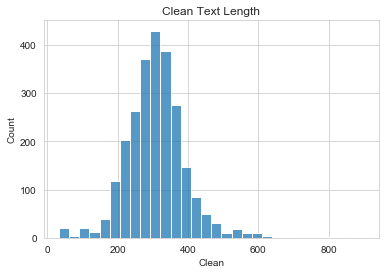

In [35]:
# Histogram to check the size of the cleaned text 

plt.title("Clean Text Length")
sns.histplot(train['Clean'].apply(lambda x: len(x.split())), bins=30)

In [36]:
# Saving files as csv
train.to_csv('FINAL_TRAIN.csv')
test.to_csv('FINAL_TEST.csv')

## Feature Extraction TFIDF


In [37]:
# Cnvert class labels to Numerical Representation

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['Classes']= le.fit_transform(train['AuthorName'])
test['Classes']= le.fit_transform(test['AuthorName'])

In [38]:
train.head()

,AuthorName,Text,Clean,Raw Length,Punctuation_count,Sentence_length,Digit_Length,Clean Length,Average_Clean_Word_Length,Average_Sentence_Length,Clean_stem,Clean_lem,Classes
0,Aaron Pressman,A break-in at the U.S. Justice Department's Wo...,A breakin US Justice Departments World Wide We...,408,81,1,2,267,307.8696,1.0,A breakin US justic depart world wide web site...,A breakin US Justice Departments World Wide We...,0
1,Aaron Pressman,Supreme Court justices Wednesday sharply quest...,Supreme Court justices Wednesday sharply quest...,505,74,1,9,310,307.8696,1.0,suprem court justic wednesday sharpli question...,Supreme Court justice Wednesday sharply questi...,0
2,Aaron Pressman,The Internet continued to grow in leaps and bo...,The Internet continued grow leaps bounds year ...,332,44,1,7,199,307.8696,1.0,the internet continu grow leap bound year onli...,The Internet continued grow leap bound year on...,0
3,Aaron Pressman,Hewlett-Packard Co. unveiled a new plan Monday...,HewlettPackard Co unveiled new plan Monday boo...,446,68,1,0,270,307.8696,1.0,hewlettpackard Co unveil new plan monday boost...,HewlettPackard Co unveiled new plan Monday boo...,0
4,Aaron Pressman,The Internet continued to grow in leaps and bo...,The Internet continued grow leaps bounds year ...,332,44,1,7,199,307.8696,1.0,the internet continu grow leap bound year onli...,The Internet continued grow leap bound year on...,0


In [39]:
# Feature Extraction USING TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=5)
X_train = tfidf.fit_transform(train['Clean'])
X_test = tfidf.transform(test['Text'])

In [40]:
print(f'''Shape of Train set:{X_train.shape}
Shape of Test set: {X_test.shape}''')

Shape of Train set:(2500, 11738)
Shape of Test set: (2500, 11738)


## Applying ML ON TFIDF

In [41]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, train['Classes'])
pred_NB = nb.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_NB, target_names=labels))

                    precision    recall  f1-score   support

    Aaron Pressman       0.81      0.94      0.87        50
       Alan Crosby       1.00      0.52      0.68        50
   Alexander Smith       0.34      0.56      0.42        50
 Benjamin Kang Lim       0.26      0.32      0.29        50
    Bernard Hickey       0.64      0.68      0.66        50
     Brad Dorfman        0.75      0.72      0.73        50
 Darren Schuettler       0.63      0.24      0.35        50
      David Lawder       0.31      0.22      0.26        50
    Edna Fernandes       0.92      0.46      0.61        50
      Eric Auchard       0.45      0.36      0.40        50
   Fumiko Fujisaki       0.93      1.00      0.96        50
   Graham Earnshaw       0.56      0.94      0.70        50
 Heather Scoffield       0.31      0.44      0.37        50
    Jane Macartney       0.52      0.68      0.59        50
       Jan Lopatka       0.15      0.10      0.12        50
     Jim Gilchrist       0.91      1.00

In [43]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, train['Classes'])
pred_SVM = svm.predict(X_test)

C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_SVM, target_names=labels))

                    precision    recall  f1-score   support

    Aaron Pressman       0.69      0.76      0.72        50
       Alan Crosby       1.00      0.20      0.33        50
   Alexander Smith       0.05      0.36      0.08        50
 Benjamin Kang Lim       0.89      0.16      0.27        50
    Bernard Hickey       0.70      0.14      0.23        50
     Brad Dorfman        0.83      0.60      0.70        50
 Darren Schuettler       0.50      0.10      0.17        50
      David Lawder       1.00      0.04      0.08        50
    Edna Fernandes       0.32      0.58      0.41        50
      Eric Auchard       0.33      0.38      0.35        50
   Fumiko Fujisaki       1.00      0.24      0.39        50
   Graham Earnshaw       0.86      0.38      0.53        50
 Heather Scoffield       0.89      0.16      0.27        50
    Jane Macartney       0.46      0.82      0.59        50
       Jan Lopatka       0.25      0.04      0.07        50
     Jim Gilchrist       0.97      0.74

In [45]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, train['Classes'])
pred_RF = RF.predict(X_test)

labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_RF, target_names=labels))


C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                    precision    recall  f1-score   support

    Aaron Pressman       0.23      0.84      0.37        50
       Alan Crosby       0.45      0.38      0.41        50
   Alexander Smith       0.14      0.40      0.21        50
 Benjamin Kang Lim       0.13      0.16      0.14        50
    Bernard Hickey       0.59      0.20      0.30        50
     Brad Dorfman        0.26      0.52      0.34        50
 Darren Schuettler       0.21      0.14      0.17        50
      David Lawder       0.31      0.16      0.21        50
    Edna Fernandes       0.21      0.12      0.15        50
      Eric Auchard       0.25      0.20      0.22        50
   Fumiko Fujisaki       0.83      0.88      0.85        50
   Graham Earnshaw       0.38      0.70      0.49        50
 Heather Scoffield       0.29      0.34      0.31        50
    Jane Macartney       0.46      0.32      0.38        50
       Jan Lopatka       0.12      0.12      0.12        50
     Jim Gilchrist       0.93      0.86

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, train['Classes'])
pred_LR = clf_lr.predict(X_test)

labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_LR, target_names=labels))


C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


                    precision    recall  f1-score   support

    Aaron Pressman       0.54      0.98      0.70        50
       Alan Crosby       1.00      0.44      0.61        50
   Alexander Smith       0.32      0.52      0.40        50
 Benjamin Kang Lim       0.22      0.30      0.25        50
    Bernard Hickey       0.69      0.44      0.54        50
     Brad Dorfman        0.80      0.70      0.74        50
 Darren Schuettler       0.46      0.24      0.32        50
      David Lawder       0.56      0.18      0.27        50
    Edna Fernandes       0.60      0.58      0.59        50
      Eric Auchard       0.41      0.42      0.42        50
   Fumiko Fujisaki       0.94      0.98      0.96        50
   Graham Earnshaw       0.72      0.92      0.81        50
 Heather Scoffield       0.30      0.38      0.33        50
    Jane Macartney       0.54      0.74      0.62        50
       Jan Lopatka       0.14      0.10      0.12        50
     Jim Gilchrist       0.93      1.00

## Applying ML ON TFIDF (LEMMATIZED)

In [47]:
# Feature Extraction USING TFIDF for Lemmatization
tfidf = TfidfVectorizer(min_df=5)
X_train = tfidf.fit_transform(train['Clean_lem'])
X_test = tfidf.transform(test['Clean_lem'])

In [48]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, train['Classes'])
pred_NB = nb.predict(X_test)
from sklearn.metrics import classification_report
labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_NB, target_names=labels))

                    precision    recall  f1-score   support

    Aaron Pressman       0.81      0.94      0.87        50
       Alan Crosby       1.00      0.52      0.68        50
   Alexander Smith       0.36      0.58      0.44        50
 Benjamin Kang Lim       0.28      0.32      0.30        50
    Bernard Hickey       0.67      0.66      0.67        50
     Brad Dorfman        0.67      0.74      0.70        50
 Darren Schuettler       0.67      0.24      0.35        50
      David Lawder       0.31      0.22      0.26        50
    Edna Fernandes       0.92      0.44      0.59        50
      Eric Auchard       0.42      0.34      0.38        50
   Fumiko Fujisaki       0.89      1.00      0.94        50
   Graham Earnshaw       0.55      0.94      0.70        50
 Heather Scoffield       0.32      0.44      0.37        50
    Jane Macartney       0.54      0.62      0.58        50
       Jan Lopatka       0.12      0.08      0.10        50
     Jim Gilchrist       0.91      1.00

In [49]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, train['Classes'])
pred_SVM = svm.predict(X_test)
labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_SVM, target_names=labels))

C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


                    precision    recall  f1-score   support

    Aaron Pressman       0.68      0.80      0.73        50
       Alan Crosby       1.00      0.20      0.33        50
   Alexander Smith       0.05      0.36      0.09        50
 Benjamin Kang Lim       0.78      0.14      0.24        50
    Bernard Hickey       0.64      0.14      0.23        50
     Brad Dorfman        0.81      0.68      0.74        50
 Darren Schuettler       0.30      0.06      0.10        50
      David Lawder       1.00      0.04      0.08        50
    Edna Fernandes       0.41      0.56      0.47        50
      Eric Auchard       0.33      0.38      0.35        50
   Fumiko Fujisaki       1.00      0.26      0.41        50
   Graham Earnshaw       0.90      0.36      0.51        50
 Heather Scoffield       0.89      0.16      0.27        50
    Jane Macartney       0.42      0.64      0.50        50
       Jan Lopatka       0.20      0.04      0.07        50
     Jim Gilchrist       1.00      0.76

In [50]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, train['Classes'])
pred_RF = RF.predict(X_test)

labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_RF, target_names=labels))

C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                    precision    recall  f1-score   support

    Aaron Pressman       0.28      0.62      0.39        50
       Alan Crosby       0.54      0.38      0.45        50
   Alexander Smith       0.25      0.36      0.30        50
 Benjamin Kang Lim       0.15      0.48      0.23        50
    Bernard Hickey       0.42      0.32      0.36        50
     Brad Dorfman        0.26      0.38      0.31        50
 Darren Schuettler       0.29      0.40      0.34        50
      David Lawder       0.50      0.26      0.34        50
    Edna Fernandes       0.21      0.22      0.22        50
      Eric Auchard       0.16      0.18      0.17        50
   Fumiko Fujisaki       0.70      0.80      0.75        50
   Graham Earnshaw       0.54      0.62      0.58        50
 Heather Scoffield       0.28      0.34      0.31        50
    Jane Macartney       0.49      0.40      0.44        50
       Jan Lopatka       0.07      0.06      0.07        50
     Jim Gilchrist       0.84      0.98

In [51]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, train['Classes'])
pred_LR = clf_lr.predict(X_test)

labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_LR, target_names=labels))


C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


                    precision    recall  f1-score   support

    Aaron Pressman       0.57      0.98      0.72        50
       Alan Crosby       1.00      0.50      0.67        50
   Alexander Smith       0.33      0.52      0.40        50
 Benjamin Kang Lim       0.23      0.32      0.26        50
    Bernard Hickey       0.72      0.42      0.53        50
     Brad Dorfman        0.78      0.72      0.75        50
 Darren Schuettler       0.43      0.24      0.31        50
      David Lawder       0.56      0.18      0.27        50
    Edna Fernandes       0.70      0.62      0.66        50
      Eric Auchard       0.43      0.40      0.42        50
   Fumiko Fujisaki       0.94      0.98      0.96        50
   Graham Earnshaw       0.71      0.92      0.80        50
 Heather Scoffield       0.30      0.38      0.33        50
    Jane Macartney       0.55      0.68      0.61        50
       Jan Lopatka       0.12      0.08      0.10        50
     Jim Gilchrist       0.93      1.00

## Applying ML ON TFIDF (STEMMED)

In [52]:
# Feature Extraction USING TFIDF for Stemming

tfidf = TfidfVectorizer(min_df=5)
X_train = tfidf.fit_transform(train['Clean_stem'])
X_test = tfidf.transform(test['Clean_stem'])

In [53]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, train['Classes'])
pred_NB = nb.predict(X_test)
from sklearn.metrics import classification_report
labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_NB, target_names=labels))

                    precision    recall  f1-score   support

    Aaron Pressman       0.82      0.94      0.88        50
       Alan Crosby       1.00      0.52      0.68        50
   Alexander Smith       0.29      0.58      0.38        50
 Benjamin Kang Lim       0.31      0.32      0.32        50
    Bernard Hickey       0.66      0.66      0.66        50
     Brad Dorfman        0.67      0.76      0.71        50
 Darren Schuettler       0.67      0.24      0.35        50
      David Lawder       0.32      0.22      0.26        50
    Edna Fernandes       0.92      0.46      0.61        50
      Eric Auchard       0.39      0.32      0.35        50
   Fumiko Fujisaki       0.91      1.00      0.95        50
   Graham Earnshaw       0.52      0.94      0.67        50
 Heather Scoffield       0.35      0.48      0.41        50
    Jane Macartney       0.52      0.74      0.61        50
       Jan Lopatka       0.15      0.08      0.10        50
     Jim Gilchrist       0.89      1.00

In [54]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, train['Classes'])
pred_SVM = svm.predict(X_test)
labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_SVM, target_names=labels))

C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


                    precision    recall  f1-score   support

    Aaron Pressman       0.73      0.74      0.73        50
       Alan Crosby       1.00      0.20      0.33        50
   Alexander Smith       0.06      0.46      0.10        50
 Benjamin Kang Lim       0.80      0.16      0.27        50
    Bernard Hickey       0.64      0.14      0.23        50
     Brad Dorfman        0.69      0.54      0.61        50
 Darren Schuettler       0.14      0.02      0.04        50
      David Lawder       0.75      0.06      0.11        50
    Edna Fernandes       0.39      0.56      0.46        50
      Eric Auchard       0.33      0.32      0.32        50
   Fumiko Fujisaki       1.00      0.28      0.44        50
   Graham Earnshaw       0.82      0.18      0.30        50
 Heather Scoffield       0.80      0.16      0.27        50
    Jane Macartney       0.40      0.50      0.45        50
       Jan Lopatka       0.29      0.04      0.07        50
     Jim Gilchrist       1.00      0.74

In [55]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, train['Classes'])
pred_RF = RF.predict(X_test)

labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_RF, target_names=labels))

C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                    precision    recall  f1-score   support

    Aaron Pressman       0.28      0.68      0.40        50
       Alan Crosby       0.56      0.46      0.51        50
   Alexander Smith       0.12      0.36      0.19        50
 Benjamin Kang Lim       0.22      0.40      0.29        50
    Bernard Hickey       0.20      0.36      0.25        50
     Brad Dorfman        0.29      0.38      0.33        50
 Darren Schuettler       0.25      0.36      0.29        50
      David Lawder       0.54      0.26      0.35        50
    Edna Fernandes       0.16      0.14      0.15        50
      Eric Auchard       0.21      0.22      0.21        50
   Fumiko Fujisaki       0.73      0.76      0.75        50
   Graham Earnshaw       0.51      0.62      0.56        50
 Heather Scoffield       0.24      0.28      0.26        50
    Jane Macartney       0.42      0.44      0.43        50
       Jan Lopatka       0.17      0.14      0.15        50
     Jim Gilchrist       0.96      0.94

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, train['Classes'])
pred_LR = clf_lr.predict(X_test)

labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_LR, target_names=labels))

C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


                    precision    recall  f1-score   support

    Aaron Pressman       0.58      0.96      0.72        50
       Alan Crosby       1.00      0.54      0.70        50
   Alexander Smith       0.26      0.42      0.32        50
 Benjamin Kang Lim       0.30      0.30      0.30        50
    Bernard Hickey       0.72      0.42      0.53        50
     Brad Dorfman        0.81      0.68      0.74        50
 Darren Schuettler       0.39      0.24      0.30        50
      David Lawder       0.60      0.24      0.34        50
    Edna Fernandes       0.61      0.62      0.61        50
      Eric Auchard       0.39      0.40      0.40        50
   Fumiko Fujisaki       0.92      0.98      0.95        50
   Graham Earnshaw       0.73      0.90      0.80        50
 Heather Scoffield       0.30      0.38      0.33        50
    Jane Macartney       0.51      0.70      0.59        50
       Jan Lopatka       0.18      0.10      0.13        50
     Jim Gilchrist       0.93      1.00

## Using Pretrained GLoveEmbeddings

In [57]:
import gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors

In [60]:
# Converting the GLovefile to Word2Vec Model
#glove2word2vec(glove_input_file="glove.6B.100d.txt", word2vec_output_file="gensim_glove_vectors.txt")

In [61]:
# Load the glove model using the gensim library
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt")

In [62]:
# Class to map the vectors that we loaded and then map them to our vocabulary. 

class Word2VecVectorizer:

    def __init__(self, model):
        self.word_vectors = model

    def fit(self, data):
        pass

    def transform(self, data):
        # determine the dimensionality of vectors
        v = self.word_vectors.get_vector('king')
        self.D = v.shape[0]

        X = np.zeros((len(data), self.D))
        n = 0
        emptycount = 0
        # Read each line in text column, and then split it by word 
        for sentence in data:
            tokens = sentence.split()
            vecs = []
            m = 0
            # For each token, check if that token is present in the pre trained word embedding
            for word in tokens:
                try:
                    # If word not found
                    vec = self.word_vectors.get_vector(word)
                    vecs.append(vec)
                    m += 1
                except KeyError:
                    pass
            # Check if there are any vectors for that word, then we take the mean of all the vectors
            if len(vecs) > 0:
                vecs = np.array(vecs)
                X[n] = vecs.mean(axis=0)
            else:
                emptycount += 1
            n += 1
            print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
            return X


    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [63]:
vectorizer = Word2VecVectorizer(glove_model)

X_train = vectorizer.fit_transform(train['Clean'])

# Get the sentence embeddings for the test dataset
X_test = vectorizer.transform(test['Clean'])
# Ytest = test_labels

Numer of samples with no words found: 0 / 2500
Numer of samples with no words found: 0 / 2500


In [64]:
X_test[0]

array([-1.13336638e-01,  1.73082277e-01,  1.82836667e-01, -6.89543933e-02,
        1.82528168e-01, -9.18091610e-02, -1.81612849e-01,  1.59249157e-01,
        7.05214664e-02, -6.30912650e-03,  1.69772759e-01, -4.45359945e-02,
        1.29507482e-01, -1.26549065e-01,  1.54037043e-01, -2.30689287e-01,
        1.27132088e-01,  8.72290805e-02, -1.49193019e-01,  1.17542163e-01,
        8.90284404e-02, -4.59882021e-02,  1.65893286e-01,  9.20170695e-02,
        5.98881468e-02, -2.48903126e-01,  3.11871117e-04, -1.35291174e-01,
       -5.58560565e-02, -3.89058026e-03,  3.87807749e-02,  4.19959873e-01,
       -1.78814515e-01, -6.19041771e-02,  1.46448165e-01,  1.64389834e-01,
       -2.00237297e-02,  1.14720603e-02, -4.40712348e-02, -3.42216492e-02,
       -1.60388425e-01, -2.74849236e-01, -1.06971860e-01, -6.30182326e-02,
       -3.94018888e-02, -1.09048905e-02,  1.10735826e-01, -2.73912460e-01,
        4.68076207e-02, -4.62370515e-01,  1.83390364e-01, -4.09960486e-02,
        5.78401759e-02,  

## Applying ML Models with Pretrained Embeddings

In [65]:
# Random Forest
RF_vec = RandomForestClassifier()
RF_vec.fit(X_train, train['Classes'])
pred_RF_Vec = RF_vec.predict(X_test)


print(classification_report(test['Classes'],pred_RF_Vec, target_names=labels))

                    precision    recall  f1-score   support

    Aaron Pressman       1.00      0.02      0.04        50
       Alan Crosby       0.00      0.00      0.00        50
   Alexander Smith       0.00      0.00      0.00        50
 Benjamin Kang Lim       0.00      0.00      0.00        50
    Bernard Hickey       0.00      0.00      0.00        50
     Brad Dorfman        0.00      0.00      0.00        50
 Darren Schuettler       0.00      0.00      0.00        50
      David Lawder       0.00      0.00      0.00        50
    Edna Fernandes       0.00      0.00      0.00        50
      Eric Auchard       0.00      0.00      0.00        50
   Fumiko Fujisaki       0.00      0.00      0.00        50
   Graham Earnshaw       0.00      0.00      0.00        50
 Heather Scoffield       0.00      0.00      0.00        50
    Jane Macartney       0.00      0.00      0.00        50
       Jan Lopatka       0.00      0.00      0.00        50
     Jim Gilchrist       0.00      0.00

C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
# SVM
svm_Vec = SVC()
svm_Vec.fit(X_train, train['Classes'])
pred_SVM_Vec = svm_Vec.predict(X_test)

print(classification_report(test['Classes'],pred_SVM_Vec, target_names=labels))

C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


                    precision    recall  f1-score   support

    Aaron Pressman       1.00      0.02      0.04        50
       Alan Crosby       0.00      0.00      0.00        50
   Alexander Smith       0.00      0.00      0.00        50
 Benjamin Kang Lim       0.00      0.00      0.00        50
    Bernard Hickey       0.00      0.00      0.00        50
     Brad Dorfman        0.00      0.00      0.00        50
 Darren Schuettler       0.00      0.00      0.00        50
      David Lawder       0.00      0.00      0.00        50
    Edna Fernandes       0.00      0.00      0.00        50
      Eric Auchard       0.00      0.00      0.00        50
   Fumiko Fujisaki       0.00      0.00      0.00        50
   Graham Earnshaw       0.00      0.00      0.00        50
 Heather Scoffield       0.00      0.00      0.00        50
    Jane Macartney       0.00      0.00      0.00        50
       Jan Lopatka       0.00      0.00      0.00        50
     Jim Gilchrist       0.00      0.00

C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
# Logistic Regression
clf_lr_Vec = LogisticRegression()
clf_lr_Vec.fit(X_train, train['Classes'])
pred_LR_Vec = clf_lr_Vec.predict(X_test)

labels = list(train['AuthorName'].unique())
print(classification_report(test['Classes'],pred_LR_Vec, target_names=labels))

                    precision    recall  f1-score   support

    Aaron Pressman       1.00      0.02      0.04        50
       Alan Crosby       0.00      0.00      0.00        50
   Alexander Smith       0.00      0.00      0.00        50
 Benjamin Kang Lim       0.00      0.00      0.00        50
    Bernard Hickey       0.00      0.00      0.00        50
     Brad Dorfman        0.00      0.00      0.00        50
 Darren Schuettler       0.00      0.00      0.00        50
      David Lawder       0.00      0.00      0.00        50
    Edna Fernandes       0.00      0.00      0.00        50
      Eric Auchard       0.00      0.00      0.00        50
   Fumiko Fujisaki       0.00      0.00      0.00        50
   Graham Earnshaw       0.00      0.00      0.00        50
 Heather Scoffield       0.00      0.00      0.00        50
    Jane Macartney       0.00      0.00      0.00        50
       Jan Lopatka       0.00      0.00      0.00        50
     Jim Gilchrist       0.00      0.00

C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\moomi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
